In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pre_df = pd.read_csv("previous_application.csv")

In [42]:
app_df=pd.read_csv('application_data.csv')

In [4]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pre_df.shape

(1670214, 37)

In [6]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Checking for percentage of null values
(pre_df.isnull().sum()*100/len(pre_df)).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

Removing the unnecessary columns with more than 40% missing values except NAME_TYPE_SUITE


In [13]:
pre_df.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)
pre_df.dropna(subset=['AMT_CREDIT','PRODUCT_COMBINATION'], inplace=True)

In [14]:
(pre_df.isnull().sum()*100/len(pre_df)).sort_values(ascending=False)

AMT_DOWN_PAYMENT               53.626846
RATE_DOWN_PAYMENT              53.626846
NAME_TYPE_SUITE                49.109181
AMT_GOODS_PRICE                23.065789
AMT_ANNUITY                    22.270576
CNT_PAYMENT                    22.270277
SK_ID_PREV                      0.000000
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
DAYS_DECISION                   0.000000
SK_ID_CURR                      0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PRO

In [15]:
pre_df.drop(columns=['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT'], axis=1, inplace=True)

In [17]:
pre_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
pre_df.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [26]:
# Filling the null values with mode for Name type Suite
pre_df['NAME_TYPE_SUITE'].fillna(pre_df.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [27]:
pre_df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      1329028
Family              213263
Spouse, partner      67069
Children             31566
Other_B              17624
Other_A               9077
Group of people       2240
Name: NAME_TYPE_SUITE, dtype: int64

In [31]:
pre_df.AMT_GOODS_PRICE.mean()

227847.27928334344

In [32]:
# Filling the null values with mean for AMT_GOODS_PRICE
pre_df.AMT_GOODS_PRICE.fillna(pre_df.AMT_GOODS_PRICE.mean(), inplace=True)

In [34]:
pre_df.AMT_ANNUITY.mean()

15955.13295173938

In [35]:
# Filling the null values with mean for AMT_ANNUITY
pre_df.AMT_ANNUITY.fillna(pre_df.AMT_ANNUITY.mean(), inplace=True)

In [36]:
pre_df.CNT_PAYMENT.mean()

16.054093928811085

In [39]:
# Filling the null values with mean for CNT_PAYMENT
pre_df.CNT_PAYMENT.fillna(pre_df.CNT_PAYMENT.mean(), inplace=True)

In [40]:
(pre_df.isnull().sum()*100/len(pre_df)).sort_values(ascending=False)

SK_ID_PREV                     0.0
NAME_PAYMENT_TYPE              0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
NAME_TYPE_SUITE                0.0
CODE_REJECT_REASON             0.0
DAYS_DECISION                  0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [43]:
# Merging the 2 datasets 
pre_merge = pd.merge(app_df[['SK_ID_CURR', 'TARGET']], pre_df, how='left', on=['SK_ID_CURR'])

pre_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   SK_ID_PREV                   1413387 non-null  float64
 3   NAME_CONTRACT_TYPE           1413387 non-null  object 
 4   AMT_ANNUITY                  1413387 non-null  float64
 5   AMT_APPLICATION              1413387 non-null  float64
 6   AMT_CREDIT                   1413387 non-null  float64
 7   AMT_GOODS_PRICE              1413387 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  NAME_CASH_LOAN_PURPOSE       1413387 non-n

In [45]:
pre_merge.shape

(1429841, 28)

In [47]:
pre_merge.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.429841e+06,1.429841e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06,1.413387e+06
mean,2.784721e+05,8.621658e-02,1.922745e+06,1.586281e+04,1.752825e+05,1.963976e+05,2.267665e+05,1.247888e+01,9.964313e-01,-8.804742e+02,3.150476e+02,1.605242e+01
std,1.028026e+05,2.806837e-01,5.327182e+05,1.302858e+04,2.936432e+05,3.195033e+05,2.779811e+05,3.331533e+00,5.963220e-02,7.835932e+02,7.695935e+03,1.288858e+01
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893620e+05,0.000000e+00,1.461345e+06,7.404210e+03,1.975500e+04,2.491200e+04,6.637489e+04,1.000000e+01,1.000000e+00,-1.314000e+03,-1.000000e+00,1.000000e+01
50%,2.789590e+05,0.000000e+00,1.922706e+06,1.507261e+04,7.090200e+04,8.064000e+04,1.638270e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675110e+05,0.000000e+00,2.384020e+06,1.675138e+04,1.800000e+05,2.156400e+05,2.278473e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,1.800000e+01
max,4.562550e+05,1.000000e+00,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


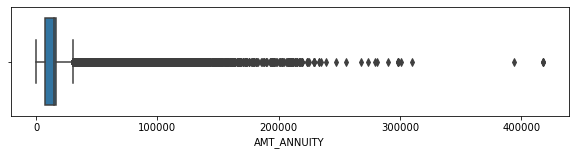

In [48]:
plt.figure(figsize=(10,2))
sns.boxplot(pre_merge['AMT_ANNUITY'])
plt.show()

In [51]:
# Removing values outside 99 percentile
pre_merge = pre_merge[pre_merge['AMT_ANNUITY'] < np.nanpercentile(pre_merge['AMT_ANNUITY'], 99)]

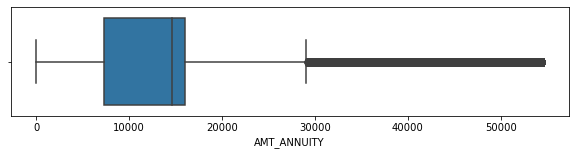

In [52]:
plt.figure(figsize=(10,2))
sns.boxplot(pre_merge['AMT_ANNUITY'])
plt.show()

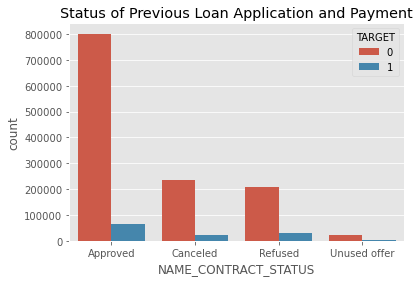

In [55]:
plt.title("Status of Previous Loan Application and Payment")
sns.countplot(pre_merge['NAME_CONTRACT_STATUS'], hue=pre_merge['TARGET'])
plt.show()

In [59]:
# Percentage of previously approved loan applicants that defaulted in current loan

loanapproved = pre_merge[pre_merge['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
loandefault = pre_merge[(pre_merge['TARGET'] == 1) & (pre_merge['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

round(default_approved*100/total_approved,2)

7.64

We can see that out of the total approved applicants, 7.64% of the applicants default in current loan.

In [60]:
# Percentage of previously refused loan applicants that pay the current loan

loanrefused = pre_merge[pre_merge['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
loannondefault = pre_merge[(pre_merge['TARGET'] == 0) & (pre_merge['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

round(loannondefault*100/loanrefused,2)

87.88

We can see that 87.88% of the applicants whose loan application was refused was able to pay the current loan.

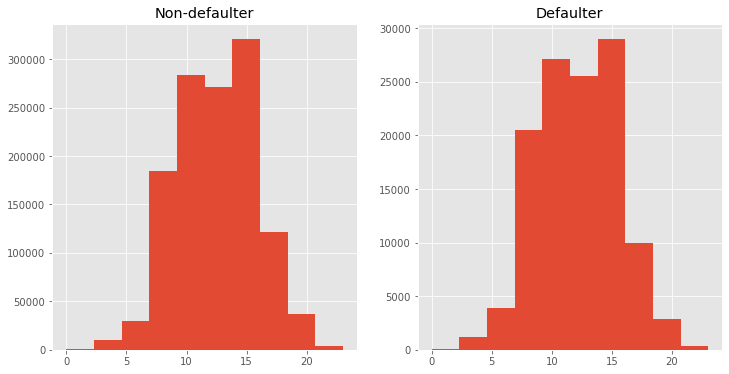

In [61]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

pre_merge[pre_merge["TARGET"] == 0]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax1)
pre_merge[pre_merge["TARGET"] == 1]["HOUR_APPR_PROCESS_START"].hist(bins=10, ax=ax2)

plt.show()


We can see that most of the loan is applied between 10 to 15hrs

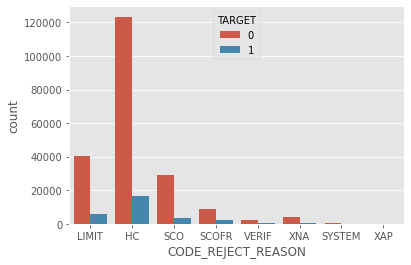

In [64]:
sns.countplot(pre_merge[pre_merge['NAME_CONTRACT_STATUS'] == "Refused"]["CODE_REJECT_REASON"], hue=pre_merge.TARGET)
plt.show()

We can see that LIMIT, HC and SCO are the main reasons for rejection.

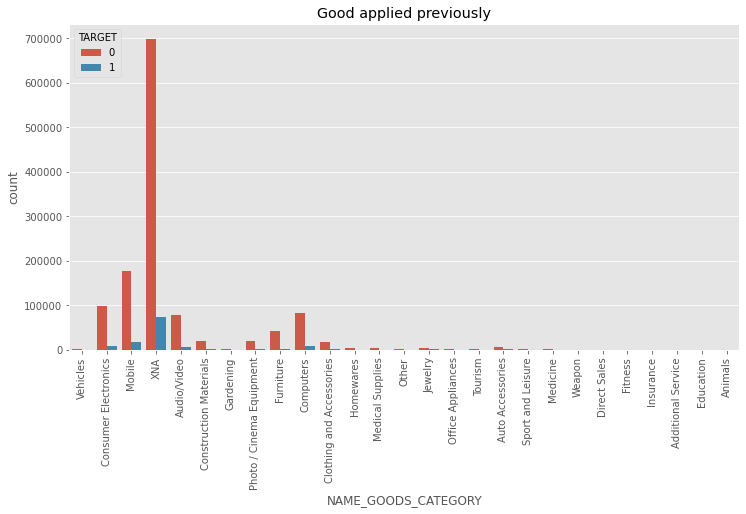

In [74]:
fig = plt.figure(figsize=(12,6))
plt.title("Good applied previously")
sns.countplot(pre_merge['NAME_GOODS_CATEGORY'], hue=pre_merge['TARGET'])
plt.xticks(rotation=90)
plt.show()

In [72]:
def defpercent(x, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in x[col].unique():
        default_cnt = x[(x[col] == value) & (x.TARGET == 1)].shape[0]
        total_cnt = x[x[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [73]:
defpercent(pre_merge,'NAME_GOODS_CATEGORY')

,Value,Percentage of Defaulter
23,Insurance,10.344828
0,Vehicles,10.239885
3,XNA,9.484016
14,Jewelry,9.092675
17,Auto Accessories,8.986585
2,Mobile,8.647201
15,Office Appliances,8.261965
21,Direct Sales,8.181818
9,Computers,8.109040
20,Weapon,7.692308


We can see that people who applied for insurance and vehicles previously are more prone to default.

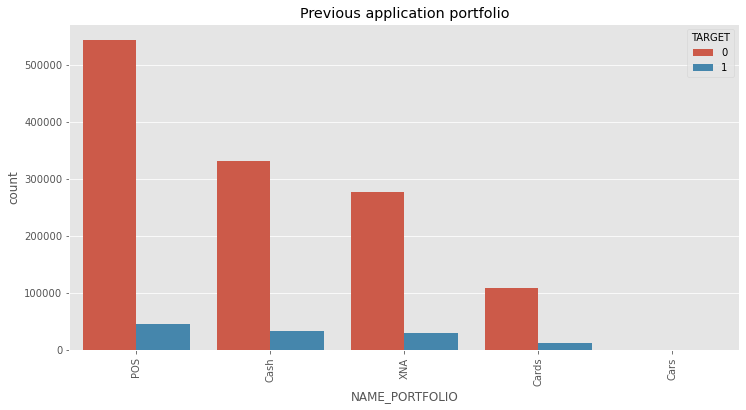

In [75]:
fig = plt.figure(figsize=(12,6))
plt.title("Previous application portfolio")
sns.countplot(pre_merge['NAME_PORTFOLIO'], hue=pre_merge['TARGET'])
plt.xticks(rotation=90)
plt.show()

In [77]:
defpercent(pre_merge,'NAME_PORTFOLIO')

,Value,Percentage of Defaulter
3,Cards,10.165419
2,XNA,9.734115
1,Cash,9.054621
0,POS,7.648003
4,Cars,5.882353


We can see that applicants with card are more prone to default

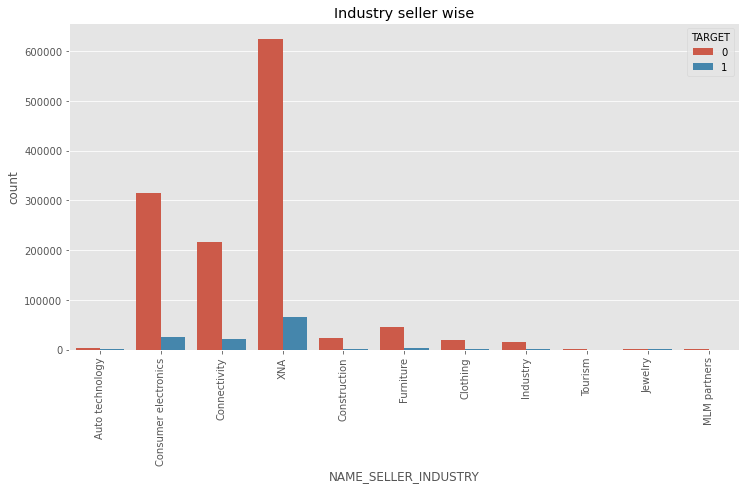

In [78]:
fig = plt.figure(figsize=(12,6))
plt.title("Industry seller wise")
sns.countplot(pre_merge['NAME_SELLER_INDUSTRY'], hue=pre_merge['TARGET'])
plt.xticks(rotation=90)
plt.show()

In [82]:
defpercent(pre_merge,'NAME_SELLER_INDUSTRY')

,Value,Percentage of Defaulter
0,Auto technology,10.361146
3,XNA,9.465362
2,Connectivity,9.197538
9,Jewelry,8.981748
1,Consumer electronics,7.557104
7,Industry,7.241948
4,Construction,6.606176
10,MLM partners,6.209150
5,Furniture,6.115541
6,Clothing,5.828949


We can see that Auto Technology has more number of defaulters.

### Conclusion

* 87.88% of the applicants whose loan application was refused was able to pay the current loan.
* Out of the total approved applicants, 7.64% of the applicants default in current loan.
* LIMIT, HC and SCO are the main reasons for rejection.
* People who applied for insurance and vehicles previously are more prone to default.
* Applicants with card are more prone to default
* Auto Technology has more number of defaulters.